In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd


### Funções representando distribuição

In [31]:
# Gráfico de pizza para mostrar a proporção de cada valor único em cada coluna de string
def plot_pie_chart(df, column_name):
    plt.figure(figsize=(8,8))
    df[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribuição de valores para a coluna {column_name}')
    plt.ylabel('')
    plt.show()


In [32]:
# Gráfico de barras para contar a frequência de cada valor único em cada coluna de string
def plot_bar_chart(df, column_name):
    plt.figure(figsize=(10,6))
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de valores para a coluna {column_name}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()



In [33]:
# Scatter plot para mostrar a variação de valores entre duas colunas
def plot_scatter(df, column1, column2):
    plt.figure(figsize=(8,6))
    plt.scatter(df[column1], df[column2])
    plt.title(f'Variação entre {column1} e {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show



In [19]:
# Histograma para mostrar a distribuição de valores em uma coluna
def plot_histogram(df, column_name, hide_x):
    plt.figure(figsize=(10,6))
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de valores para a coluna {column_name}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    if(hide_x == True):
        plt.xticks([])
    plt.show()

## Base materiais e serviços

In [6]:
# Driver para linux: /opt/microsoft/msodbcsql17/lib64/libmsodbcsql-17.10.so.1.1
def get_connection(db_config_path):
    with open(db_config_path, encoding='utf8') as db:
        database = ';'.join(db.readlines()[1:]).replace('\n', '').replace(' ', '') + ';'
    return pyodbc.connect('DRIVER={/opt/microsoft/msodbcsql18/lib64/libmsodbcsql-18.3.so.2.1};' + database + 'TrustServerCertificate=yes;')

In [7]:
con = get_connection('materiaisServicos/config.ini')
sqlMaterial = """SELECT 
            m.ID_MATERIAL, 
            p.TIPO, 
            M.CODIGO_MATERIAL, 
            M.ITEM_SUSPENSO,
            M.MATERIAL_SUSTENTAVEL,
            c.CODIGO_CLASSE,
            c.DESCRICAO_CLASSE,
            s.CODIGO_SUBCLASSE,
            s.DESCRICAO_SUBCLASSE,
            g.CODIGO_GRUPO,
            g.DESCRICAO_GRUPO,
            d.CODIGO_DIVISAO,
            d.DESCRICAO_DIVISAO,
            s2.CODIGO_SECAO,
            s2.DESCRICAO_SECAO,
            ISNULL(STUFF((SELECT ' ' + CONCAT(c.CARACTERISTICA, ' ', CV.CARACTERISTICA_VALOR, cv.SIGLA_UNIDADE_MEDIDA)
                        FROM CATALOGO.MATERIAL_CARACTERISTICA mc
                        JOIN CATALOGO.PDM_CARACTERISTICA pc ON pc.ID_PDM_CARACTERISTICA = mc.ID_PDM_CARACTERISTICA
                        JOIN CATALOGO.CARACTERISTICAS c ON pc.ID_CARACTERISTICA = c.ID_CARACTERISTICA
                        JOIN CATALOGO.CARACTERISTICAS_VALORES cv ON cv.ID_CARACTERISTICA_VALOR = pc.ID_CARACTERISTICA_VALOR
                        WHERE mc.ID_MATERIAL = m.ID_MATERIAL
                        FOR XML PATH('')), 1, 1, ''), '') AS CARACTERISTICAS_BUSCA,
            p.NOME_MATERIAL, 
            CONCAT(p.NOME_MATERIAL, ' ', ISNULL(STUFF((SELECT ' ' + CONCAT(c.CARACTERISTICA, ' ', CV.CARACTERISTICA_VALOR, cv.SIGLA_UNIDADE_MEDIDA)
                                                    FROM CATALOGO.MATERIAL_CARACTERISTICA mc
                                                    JOIN CATALOGO.PDM_CARACTERISTICA pc ON pc.ID_PDM_CARACTERISTICA = mc.ID_PDM_CARACTERISTICA
                                                    JOIN CATALOGO.CARACTERISTICAS c ON pc.ID_CARACTERISTICA = c.ID_CARACTERISTICA
                                                    JOIN CATALOGO.CARACTERISTICAS_VALORES cv ON cv.ID_CARACTERISTICA_VALOR = pc.ID_CARACTERISTICA_VALOR
                                                    WHERE mc.ID_MATERIAL = m.ID_MATERIAL
                                                    FOR XML PATH('')), 1, 1, ''), '')) AS MATERIAL_TEXT
        FROM CATALOGO.MATERIAIS m
        JOIN CATALOGO.PDM p ON m.ID_PDM = p.ID_PDM
        LEFT JOIN CATALOGO.CLASSES c ON p.ID_CLASSE = c.ID_CLASSE
        LEFT JOIN CATALOGO.SUBCLASSES s ON c.ID_CLASSE = s.ID_CLASSE
        LEFT JOIN CATALOGO.GRUPOS g ON g.ID_GRUPO = c.ID_GRUPO
        LEFT JOIN CATALOGO.DIVISOES d ON d.ID_DIVISAO = g.ID_DIVISAO
        LEFT JOIN CATALOGO.SECOES s2 ON S2.ID_SECAO = D.ID_SECAO
"""

In [8]:
df_materiais = pd.read_sql_query(sqlMaterial, con)
df_materiais

/tmp/ipykernel_97279/2123792220.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_materiais = pd.read_sql_query(sqlMaterial, con)


,ID_MATERIAL,TIPO,CODIGO_MATERIAL,ITEM_SUSPENSO,MATERIAL_SUSTENTAVEL,CODIGO_CLASSE,DESCRICAO_CLASSE,CODIGO_SUBCLASSE,DESCRICAO_SUBCLASSE,CODIGO_GRUPO,DESCRICAO_GRUPO,CODIGO_DIVISAO,DESCRICAO_DIVISAO,CODIGO_SECAO,DESCRICAO_SECAO,CARACTERISTICAS_BUSCA,NOME_MATERIAL,MATERIAL_TEXT
0,428763,S,19,N,N,8319,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",83190,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",831,SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,83,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",8,"SERVIÇOS DE ARQUITETURA, DESENHOS TÉCNICOS, PE...",,Estudos e Projetos Viabilidade Técnico - Econô...,Estudos e Projetos Viabilidade Técnico - Econô...
1,428764,S,27,N,N,8319,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",83190,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",831,SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,83,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",8,"SERVIÇOS DE ARQUITETURA, DESENHOS TÉCNICOS, PE...",,Estudos e Projetos de Viabilidade Técnico - Ec...,Estudos e Projetos de Viabilidade Técnico - Ec...
2,428765,S,35,N,N,8319,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",83190,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",831,SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,83,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",8,"SERVIÇOS DE ARQUITETURA, DESENHOS TÉCNICOS, PE...",,Estudos e Projetos de Viabilidade Técnico - Ec...,Estudos e Projetos de Viabilidade Técnico - Ec...
3,428766,S,43,N,N,8319,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",83190,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",831,SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,83,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",8,"SERVIÇOS DE ARQUITETURA, DESENHOS TÉCNICOS, PE...",,Estudos e Projetos Viabilidade Técnico - Econô...,Estudos e Projetos Viabilidade Técnico - Econô...
4,428767,S,51,N,N,8319,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",83190,"OUTROS SERVIÇOS DE GERÊNCIA/GESTÃO, EXCETO OS ...",831,SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,83,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",8,"SERVIÇOS DE ARQUITETURA, DESENHOS TÉCNICOS, PE...",,Estudos e Projetos Urbanísticos / Paisagístico...,Estudos e Projetos Urbanísticos / Paisagístico...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257757,683446,M,377520,S,N,6145,FIOS E CABOS ELÉTRICOS,None,None,61,CONDUTORES ELÉTRICOS E EQUIPAMENTOS PARA GERAÇ...,None,None,None,None,Aplicação Uso Em Vídeo Características Adicion...,Cabo De Vídeo,Cabo De Vídeo Aplicação Uso Em Vídeo Caracterí...
257758,683447,M,377519,S,N,6145,FIOS E CABOS ELÉTRICOS,None,None,61,CONDUTORES ELÉTRICOS E EQUIPAMENTOS PARA GERAÇ...,None,None,None,None,Aplicação Uso Em Vídeo N° De Cabos 3UN Tipo An...,Cabo De Vídeo,Cabo De Vídeo Aplicação Uso Em Vídeo N° De Cab...
257759,683780,M,612103,N,N,6540,"EQUIPAMENTOS, INSTRUMENTOS E SUPRIMENTOS OFTAL...",None,None,65,"EQUIPAMENTOS E ARTIGOS PARA USO MÉDICO, DENTÁR...",None,None,None,None,Tipo Grande Ocular Modelo De Não Contato Aplic...,Sistema De Lentes Para Equipamento Oftalmológico,Sistema De Lentes Para Equipamento Oftalmológi...
257760,683781,M,229763,N,N,6540,"EQUIPAMENTOS, INSTRUMENTOS E SUPRIMENTOS OFTAL...",None,None,65,"EQUIPAMENTOS E ARTIGOS PARA USO MÉDICO, DENTÁR...",None,None,None,None,Material Cristal Características Adicionais Au...,Sistema De Lentes Para Equipamento Oftalmológico,Sistema De Lentes Para Equipamento Oftalmológi...


In [9]:
df_materiais.isnull().sum()

ID_MATERIAL                   0
TIPO                          0
CODIGO_MATERIAL               0
ITEM_SUSPENSO                 0
MATERIAL_SUSTENTAVEL          0
CODIGO_CLASSE               731
DESCRICAO_CLASSE            731
CODIGO_SUBCLASSE         248966
DESCRICAO_SUBCLASSE      248966
CODIGO_GRUPO                731
DESCRICAO_GRUPO             731
CODIGO_DIVISAO           254597
DESCRICAO_DIVISAO        254597
CODIGO_SECAO             254597
DESCRICAO_SECAO          254597
CARACTERISTICAS_BUSCA         0
NOME_MATERIAL                 0
MATERIAL_TEXT                 0
dtype: int64

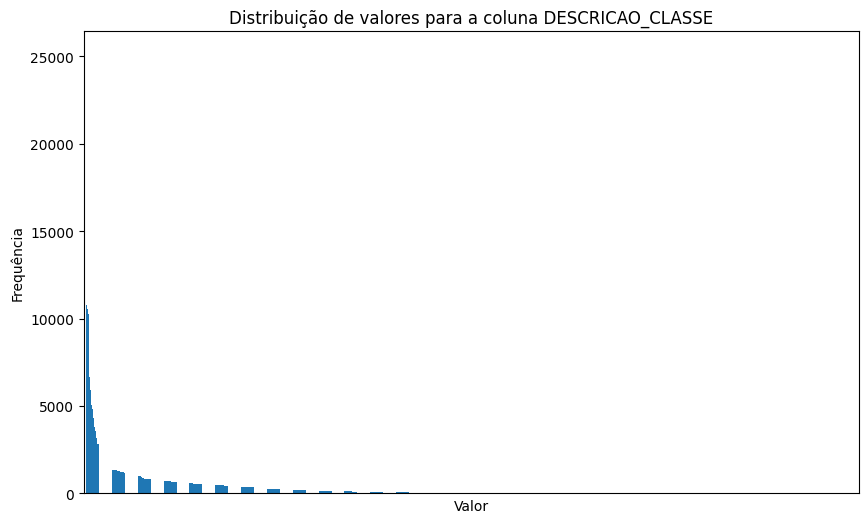

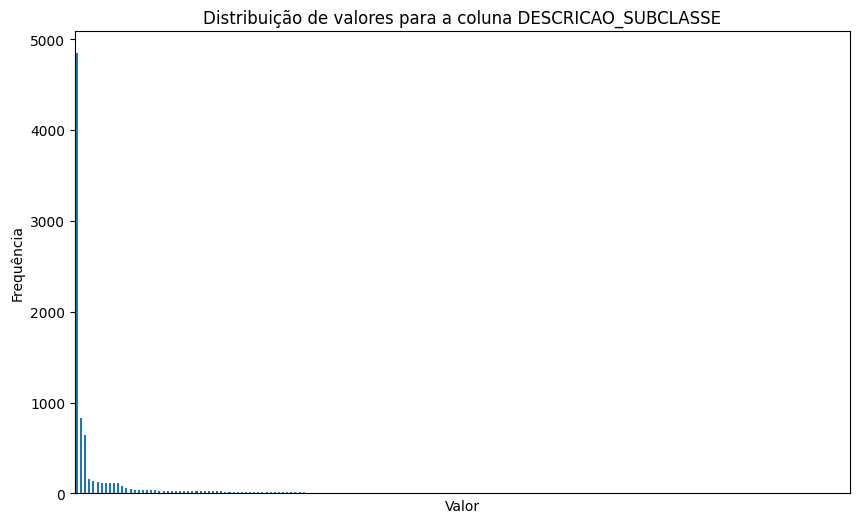

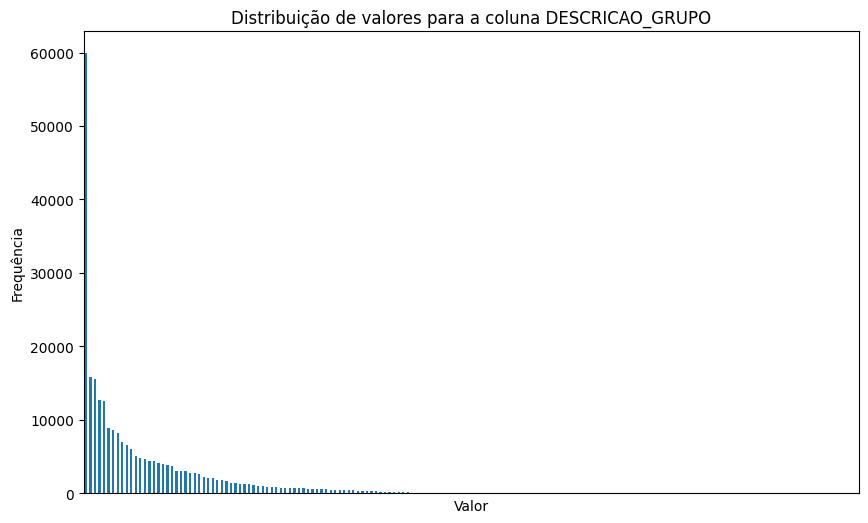

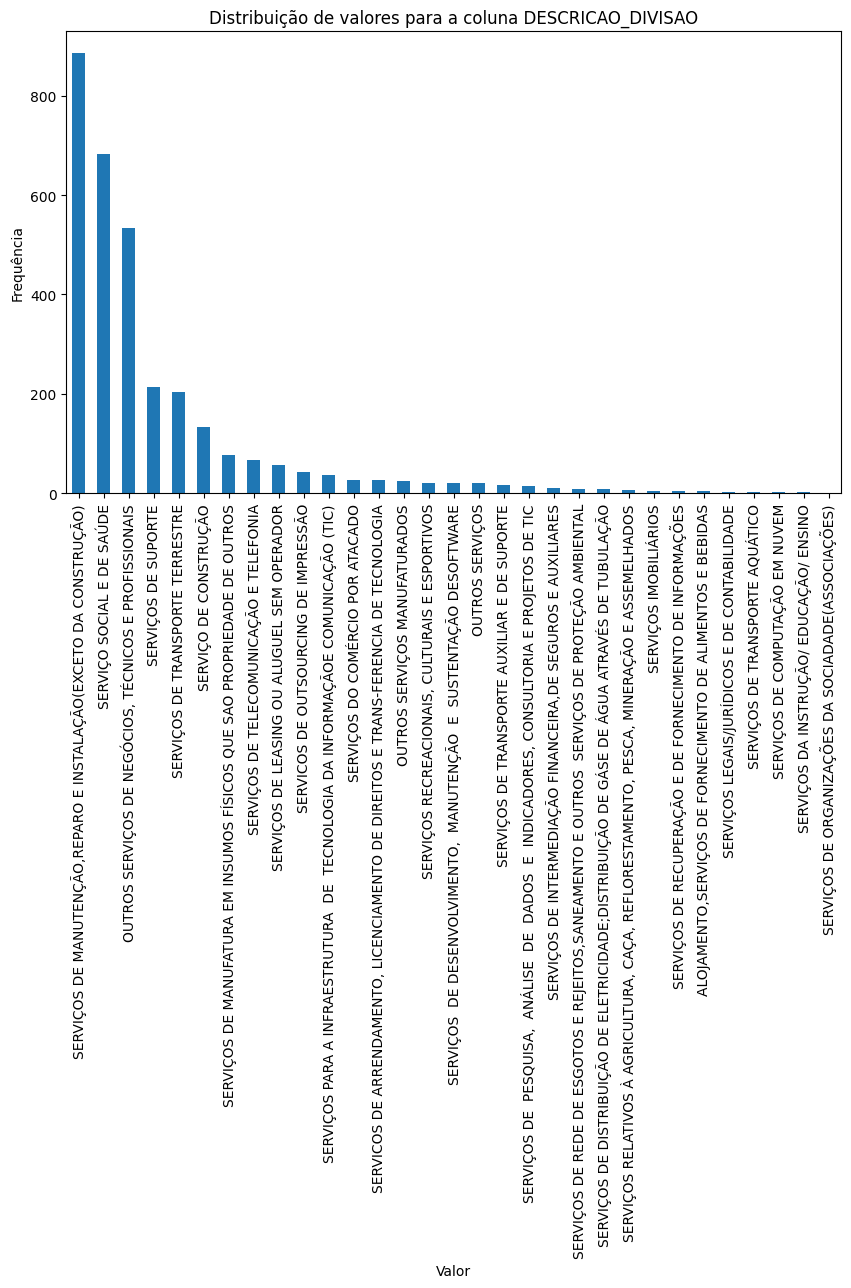

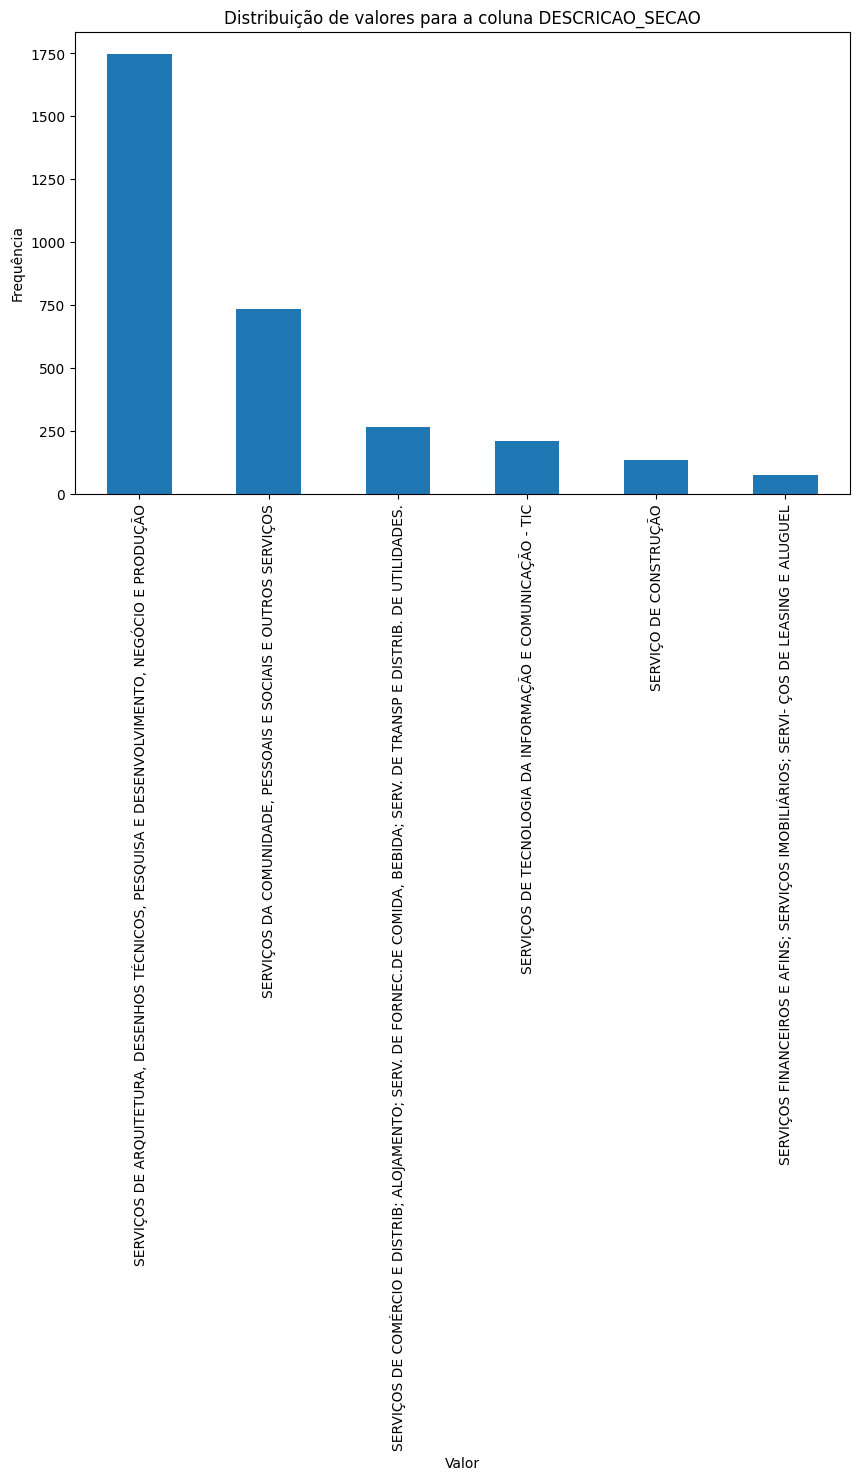

In [20]:
#Sem a coluna MATERIAL_TEXT. Alvo de concatenação, dificilmente se repete
colunas_string = ['DESCRICAO_CLASSE', 'DESCRICAO_SUBCLASSE', 'DESCRICAO_GRUPO', 'DESCRICAO_DIVISAO', 'DESCRICAO_SECAO']

for coluna in colunas_string:
    if coluna == "DESCRICAO_DIVISAO" or coluna == "DESCRICAO_SECAO":
        plot_histogram(df_materiais, coluna, False)
    else:
        plot_histogram(df_materiais, coluna, True)
        

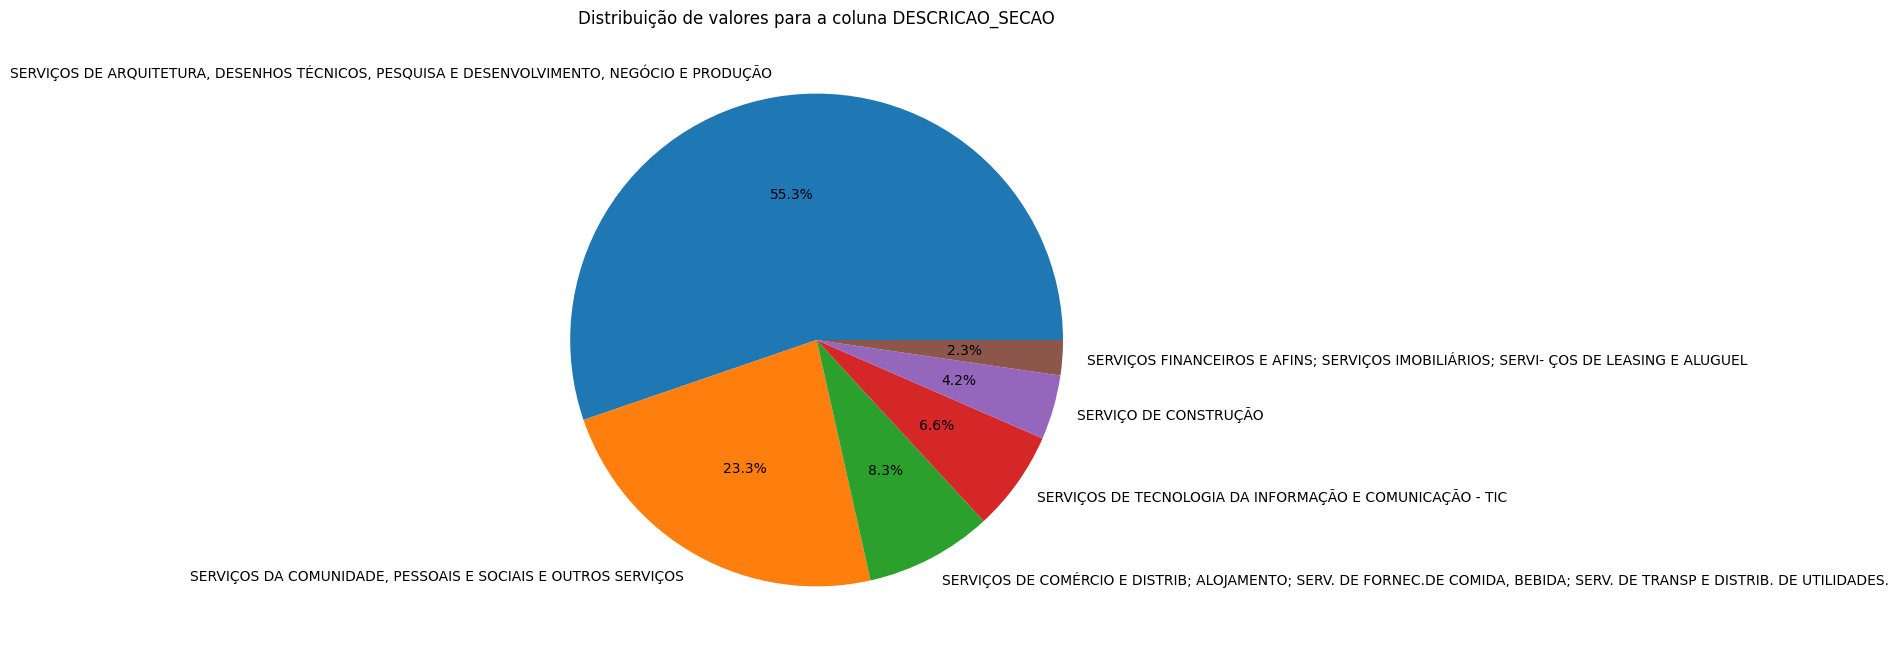

In [36]:
plot_pie_chart(df_materiais, 'DESCRICAO_SECAO')
      

TypeError: 'value' must be an instance of str or bytes, not a None

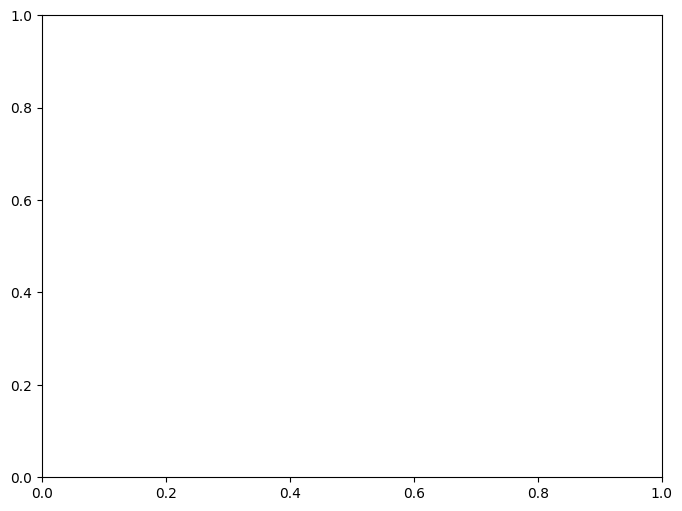

In [30]:
#Sem a coluna MATERIAL_TEXT. Alvo de concatenação, dificilmente se repete
colunas_string = ['DESCRICAO_CLASSE', 'DESCRICAO_SUBCLASSE', 'DESCRICAO_GRUPO', 'DESCRICAO_DIVISAO', 'DESCRICAO_SECAO']

for coluna in colunas_string:
    if coluna == 'DESCRICAO_CLASSE':
        if len(colunas_string) > 1:
            plot_scatter(df_materiais, coluna, colunas_string[1])
      

# Base Nota Fiscal

CSV retirado dos valores unique do campo "DESCRICAO_PRODUTO" da base de dados. Não importando qual a compra, mas sim o item individualmente.


In [4]:
df_nf = pd.read_csv('notasFiscais/tradicImplNF/df_nf_unique.csv')
df_nf

,DESCRICAO_PRODUTO
0,"SKOL 600ML 6,..."
1,"ANTARCTICA PILSEN LATA 350ML SH C/12 NPAL 10,..."
2,"PEPSI COLA PET 2L CAIXA C/6 9,..."
3,Potes Hermeticos Porta-Mantimentos Tampa Bambu...
4,GRIPINEW C/20 CPR
...,...
2248617,ROSQUINHA CHOCOLATE ZERO LOW 150G
2248618,BISC HOT CRACK QUEIJO 150G
2248619,MACARRAO NINHO LARGO PARATI 500G
2248620,GRAFITE ESTAMPADAS


In [5]:
df_nf.isnull().sum()

DESCRICAO_PRODUTO    1
dtype: int64

In [3]:
df_unique_index_nf = pd.read_csv('df_unique_index_nf.csv')
df_unique_index_nf

,Unnamed: 0.1,Unnamed: 0,ID,MODELO,SERIE,NUMERO_NOTA_FISCAL,DATA_EMISSAO,CNPJ_CPF_EMITENTE,RAZAO_SOCIAL_EMITENTE,NOME_FANTASIA_EMITENTE,...,DESCRICAO_PRODUTO,UNIDADE_PRODUTO,UNIDADE_PRODUTO_TRIBUTAVEL,QUANTIDADE_PRODUTO,QUANTIDADE_PRODUTO_TRIBUTAVEL,VALOR_PRODUTO,VALOR_PRODUTO_TRIBUTAVEL,CODIGO_BARRA,CODIGO_BARRA_TRIBUTAVEL,NCM
0,0,0,49537821,55,1,13870,2023-01-18 00:00:00.000,25546178000163,E. Zicolau Comercio Eletronico Me,Magazine Mega,...,Kit Eletrofita 2 Pistas 3 Metros 750V 10A,UN,UN,1.0,1.0,99.50,99.50,7901065314497,7901065314497,85444900
1,1,1,53886647,55,1,109951,2023-02-22 00:00:00.000,5677144000109,COMPLETA COMERCIO DE FERRAGENS E UTILIDADES EI...,COMPLETA,...,ABRAC TIPO U VERG 1X1/4 25PC,UN,UN,1.0,1.0,78.09,78.09,7899960444053,7899960444053,73269090
2,2,2,38357115,55,1,2927,2022-10-26 00:00:00.000,22793733000406,F PELEGRINELLI EIRELI,REI DOS PNEUS - FILIAL3,...,KIT AMORTECEDOR COMPLETO NAKATA LE,UN,PC,1.0,1.0,210.00,210.00,7890903046815,7890903046815,87088000
3,3,3,67282171,55,8,100,2023-06-02 00:00:00.000,28649167000105,A THOMAZINI COELHO FARMA LTDA,NaN,...,CEBRILIN 30MG C/30 COMP LIBBS,UND,UND,4.0,4.0,154.73,154.73,7896094202276,7896094202276,30049079
4,4,4,33006554,55,1,12023,2022-09-19 00:00:00.000,28411830000120,AGRONORTE COMERCIO E REPRESENTACAO LTDA,AGRONORTE PRODUTOS AGROPECUARIOS,...,FOICE COMUM LEVE LP,UN,UN,1.0,1.0,65.00,65.00,7898906966277,7898906966277,82019000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124634,1124684,1124684,75293628,55,1,744,2023-07-28 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.51),UN,UN,1.0,1.0,93.42,93.42,7891033716418,7891033716418,33072010
1124635,1124685,1124685,75324339,55,1,750,2023-07-29 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.17),UN,UN,1.0,1.0,82.43,82.43,7891033716418,7891033716418,33072010
1124636,1124686,1124686,75501409,55,1,151025,2023-07-31 00:00:00.000,26554435000171,L & G ALIMENTOS DO BRASIL LTDA,MERCALE - ARV,...,LIMP PISO CIF PERFUME 900ML ENERGIZANTE UN QTD...,UN,UN,6.0,6.0,6.48,6.48,7891150071537,7891150071537,34025000
1124637,1124687,1124687,75561037,55,5,4712030,2023-07-31 00:00:00.000,14190675000317,LSI S.A.,LSI S.A.,...,LOVERS FORCEPS 18R ADULTO - GOLGRAN,UNIDAD,1,1.0,1.0,93.90,93.90,7899065804998,7899065804998,90184999


<Axes: >

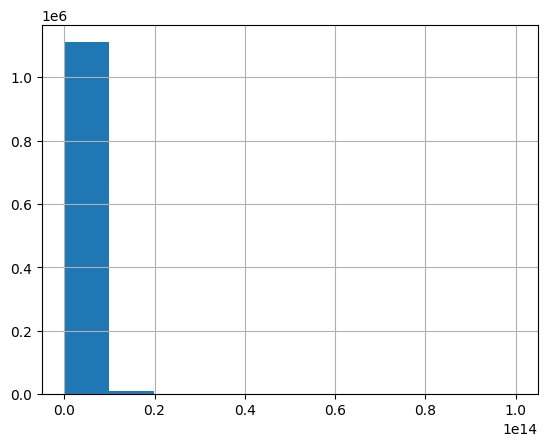

In [10]:
df_unique_index_nf['CODIGO_BARRA'].hist()

In [11]:
value_counts = df_unique_index_nf['CODIGO_BARRA'].value_counts()
value_counts

CODIGO_BARRA
7891033481309    184
7891033480623    179
7891033826896    177
7891033301928    176
7891033826889    174
                ... 
7893986588364      1
7898469641246      1
7909636681658      1
7899728201232      1
7899658421137      1
Name: count, Length: 831981, dtype: int64

In [13]:
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Histograma dos Valores Mais Frequentes')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

KeyboardInterrupt: 

In [2]:
dv_relev_sample = pd.read_csv('queries_relv.csv')
cod_barras = dv_relev_sample['CODIGO_BARRA'].to_list()
cod_barras

[7898062608721,
 7896380173433,
 7891000261026,
 7891260382752,
 7891117007128,
 7896040704625,
 7891435051834,
 7898133136450,
 7897801300841,
 7897801301763,
 7891040113491,
 7896079587329,
 7500435157513,
 7895500761178,
 7891033716418,
 7898526969856,
 7898932213895,
 7898610372555,
 7891019170609,
 7898075640053,
 7908324400298,
 7891242161818,
 7896011102610,
 7899381693962,
 7891521359127,
 7893371000259,
 7891117003748,
 7899952304273,
 7891033773572,
 7891321333174,
 7500435169370,
 7891317439002,
 7898436366844,
 7894325109585,
 7896112401926,
 7891150036390,
 4005808335435,
 7896004720838,
 7804540226387,
 7898330152109,
 7891696009551,
 4013790009432,
 7898360914173,
 7891150071537,
 7891117003922,
 7908324400120,
 7899065804998,
 789109550004,
 7897016830133,
 7891035800245]

In [5]:
df_teste = df_unique_index_nf[df_unique_index_nf['CODIGO_BARRA'].isin(cod_barras)]
df_teste

,Unnamed: 0.1,Unnamed: 0,ID,MODELO,SERIE,NUMERO_NOTA_FISCAL,DATA_EMISSAO,CNPJ_CPF_EMITENTE,RAZAO_SOCIAL_EMITENTE,NOME_FANTASIA_EMITENTE,...,DESCRICAO_PRODUTO,UNIDADE_PRODUTO,UNIDADE_PRODUTO_TRIBUTAVEL,QUANTIDADE_PRODUTO,QUANTIDADE_PRODUTO_TRIBUTAVEL,VALOR_PRODUTO,VALOR_PRODUTO_TRIBUTAVEL,CODIGO_BARRA,CODIGO_BARRA_TRIBUTAVEL,NCM
1123932,1123932,1123932,21152,55,1,115652,2022-01-02 00:00:00.000,84308980000184,A.C.D.A. IMPORTACAO E EXPORTACAO LTDA,ARASUPER BOSQUE,...,IOG POLPA NINHO 540G,UN1,UN1,1.0,1.0,6.69,6.69,7891000261026,7891000261026,4031000
1123933,1123933,1123933,35412,55,2,6658,2022-01-03 00:00:00.000,4119970001214,AGRO BOI IMPORTACAO E EXPORTACAO LTDA,AGROBOI CORES,...,"ACRILICO TOQUE DE LUZ 3,2L BASE C2",UN,UN,1.0,1.0,140.00,140.00,7891260382752,7891260382752,32091010
1123934,1123934,1123934,72951,55,1,23493,2022-01-03 00:00:00.000,4521258001590,J CRUZ LTDA-HOJE,HOJE COSMETICS 15-90,...,KIT PANTENE HIDRATACAO SH350ML+COND175ML,UN,UN,12.0,12.0,21.37,21.37,7500435169370,7500435169370,33051000
1123935,1123935,1123935,106527,55,1,199740,2022-01-03 00:00:00.000,3345935000106,DISFRI IMPORTACAO E EXPORTACAO LTDA - F5,DISFRI-RIO BRANCO MATRIZ,...,IOG POLPA NINHO MORANGO 540G(1968),BJ,BJ,6.0,6.0,5.90,5.90,7891000261026,7891000261026,4031000
1123936,1123936,1123936,141465,55,1,28596,2022-01-04 00:00:00.000,14804412000350,SUPERMERCADO PAGUE POUCO LTDA,SUPERMERCADO PAGUE POUCO,...,LIMP VEJA DESNG SQUEEZE L500P400ML,UN1,UN1,1.0,1.0,9.49,9.49,7891035800245,7891035800245,34022000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124634,1124684,1124684,75293628,55,1,744,2023-07-28 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.51),UN,UN,1.0,1.0,93.42,93.42,7891033716418,7891033716418,33072010
1124635,1124685,1124685,75324339,55,1,750,2023-07-29 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.17),UN,UN,1.0,1.0,82.43,82.43,7891033716418,7891033716418,33072010
1124636,1124686,1124686,75501409,55,1,151025,2023-07-31 00:00:00.000,26554435000171,L & G ALIMENTOS DO BRASIL LTDA,MERCALE - ARV,...,LIMP PISO CIF PERFUME 900ML ENERGIZANTE UN QTD...,UN,UN,6.0,6.0,6.48,6.48,7891150071537,7891150071537,34025000
1124637,1124687,1124687,75561037,55,5,4712030,2023-07-31 00:00:00.000,14190675000317,LSI S.A.,LSI S.A.,...,LOVERS FORCEPS 18R ADULTO - GOLGRAN,UNIDAD,1,1.0,1.0,93.90,93.90,7899065804998,7899065804998,90184999


In [6]:
value_counts = df_teste['CODIGO_BARRA'].value_counts()
value_counts

CODIGO_BARRA
7896040704625    47
7891033716418    47
7908324400120    43
7891033773572    41
7891117007128    32
7897801300841    26
7891117003922    24
7891035800245    23
7891260382752    22
7891000261026    21
7899381693962    20
7896004720838    19
4005808335435    18
7893371000259    17
7897801301763    16
7898133136450    14
7898075640053    13
7896011102610    13
7891150036390    13
7898062608721    12
7891435051834    12
7896380173433    12
7891117003748    12
7891321333174    11
7891242161818    11
7908324400298    11
7899952304273    11
7891019170609    10
7898360914173    10
7898330152109    10
7891696009551    10
4013790009432     9
7891150071537     8
7895500761178     7
7891317439002     7
7500435157513     7
7804540226387     7
7897016830133     6
7898436366844     6
7896079587329     6
7899065804998     5
7896112401926     5
7898610372555     5
7891040113491     4
7898526969856     4
7891521359127     4
7894325109585     4
7500435169370     4
789109550004      4
7898932

In [9]:
import matplotlib.pyplot as plt

In [ ]:
value_counts = df_teste['coluna'].value_counts()
